In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

### 결측치 확인

In [4]:
train_df.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

결측값이 있는 변수:
Age(나이), DurationOfPitch(영업 사원이 고객에게 제공하는 프레젠테이션 기간), NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수) + NuberOfTrips(평균 연간 여행 횟수) + NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수) +MonthlyIncome(월 급여) + TypeofContact(고객의 제품 인지 방법 )

In [5]:
# 나이 : 94
train_df['Age'][train_df['Age'].isnull()].index

Int64Index([  13,   26,   35,   87,  121,  124,  127,  137,  139,  164,  179,
             184,  199,  205,  235,  253,  256,  270,  271,  297,  309,  312,
             343,  353,  395,  488,  495,  525,  528,  548,  574,  578,  583,
             630,  632,  637,  658,  665,  666,  697,  701,  717,  722,  752,
             777,  788,  854,  855,  893,  900,  901,  905,  914,  983, 1042,
            1056, 1074, 1116, 1124, 1148, 1154, 1162, 1166, 1167, 1259, 1279,
            1288, 1309, 1319, 1353, 1369, 1395, 1401, 1441, 1551, 1557, 1609,
            1620, 1622, 1713, 1751, 1760, 1761, 1762, 1787, 1803, 1821, 1845,
            1869, 1882, 1888, 1914, 1916, 1923],
           dtype='int64')

In [6]:
# 고객의 제품 인지 방법 : 10
train_df['TypeofContact'][train_df['TypeofContact'].isnull()].index

Int64Index([50, 83, 362, 477, 618, 1215, 1473, 1748, 1897, 1911], dtype='int64')

In [7]:
#영업 사원이 고객에게 제공하는 프레젠테이션 기간 : 102
b = train_df['DurationOfPitch'][train_df['DurationOfPitch'].isnull()].index

In [8]:
# 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수 : 13
c = train_df['NumberOfFollowups'][train_df['NumberOfFollowups'].isnull()].index

In [9]:
# 평균 연간 여행 횟수 : 57
d = train_df['NumberOfTrips'][train_df['NumberOfTrips'].isnull()].index

In [10]:
# 함께 여행을 계획 중인 5세 미만의 어린이 수 : 27 
e = train_df['NumberOfChildrenVisiting'][train_df['NumberOfChildrenVisiting'].isnull()].index

In [11]:
# 월급여 : 100
f = train_df['MonthlyIncome'][train_df['MonthlyIncome'].isnull()].index

In [12]:
print(d & e)

Int64Index([], dtype='int64')


<ipython-input-12-02a5a72c7bf8>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  print(d & e)


### 결측치 처리

1. 나이 -> 평균값(37.0)으로 채우기

In [13]:
print(train_df['Age'].value_counts())
print(train_df['Age'].mean())

35.0    96
33.0    88
32.0    86
36.0    84
37.0    84
34.0    79
38.0    74
41.0    74
30.0    70
31.0    68
29.0    68
28.0    62
39.0    61
40.0    57
42.0    55
43.0    53
45.0    53
27.0    51
26.0    42
46.0    42
44.0    41
51.0    36
49.0    32
25.0    31
47.0    31
53.0    30
50.0    29
54.0    27
48.0    26
24.0    24
52.0    24
55.0    23
23.0    23
22.0    20
21.0    17
56.0    17
19.0    16
59.0    14
20.0    13
60.0    12
58.0    11
57.0     9
18.0     5
61.0     3
Name: Age, dtype: int64
37.46211714132187


2. DurationOfPitch -> 최빈값(9)으로 채우기

In [14]:
train_df['DurationOfPitch'].value_counts()

9.0     199
7.0     126
8.0     122
6.0     116
16.0    114
14.0    112
15.0    105
10.0    103
12.0     85
11.0     83
13.0     83
17.0     75
23.0     41
30.0     39
22.0     36
31.0     34
25.0     32
27.0     31
32.0     30
35.0     29
20.0     29
29.0     27
26.0     27
24.0     27
28.0     25
21.0     24
18.0     23
33.0     22
19.0     18
34.0     18
36.0     15
5.0       3
Name: DurationOfPitch, dtype: int64

In [15]:
train_df['DurationOfPitch'].mean()

15.524015110631408

3. TypeofContact -> Unknown이라는 값으로 채우기

고객의 제품 인지 방법으로 회사의 홍보 or 스스로 검색인데 결측값이 10개 정도로 되어있기 때문에 unknown이라고 값을 부여

In [16]:
train_df['TypeofContact'].value_counts()

Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

4. NumberOfFollowups  -> 최빈값(4)으로 채워주기 

In [17]:
print(train_df['NumberOfFollowups'].value_counts())
print(train_df['NumberOfFollowups'].mean())

4.0    831
3.0    571
5.0    330
2.0     89
1.0     74
6.0     47
Name: NumberOfFollowups, dtype: int64
3.718331616889804


5. PreferredPropertyStar -> 최빈값(3)으로 채우기

In [18]:
print(train_df['PreferredPropertyStar'].value_counts())
print(train_df['PreferredPropertyStar'].mean())

3.0    1212
5.0     373
4.0     360
Name: PreferredPropertyStar, dtype: int64
3.568637532133676


6. NumberOfTrips -> 평균값 (3)으로 채우기

In [19]:
print(train_df['NumberOfTrips'].value_counts())
print(train_df['NumberOfTrips'].mean())

2.0     594
3.0     426
1.0     234
4.0     189
5.0     188
6.0     135
7.0      94
8.0      37
19.0      1
Name: NumberOfTrips, dtype: int64
3.255532139093783


7. NumberOfChildrenVisiting -> 최빈값(1)으로 채우기

In [20]:
print(train_df['NumberOfChildrenVisiting'].value_counts())
print(train_df['NumberOfChildrenVisiting'].mean())

1.0    819
2.0    559
0.0    416
3.0    134
Name: NumberOfChildrenVisiting, dtype: int64
1.213174273858921


8. MonthlyIncome -> 평균값(22912.0) 으로 채우기 

In [21]:
print(train_df['MonthlyIncome'].mean())

23624.108894878707


In [22]:
train_df['Age'] = train_df['Age'].fillna(37)
train_df['DurationOfPitch'] = train_df['DurationOfPitch'].fillna(9)
train_df['TypeofContact'] = train_df['TypeofContact'].fillna("Unknown")
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].fillna(4)
train_df['PreferredPropertyStar'] = train_df['PreferredPropertyStar'].fillna(3)
train_df['NumberOfTrips'] = train_df['NumberOfTrips'].fillna(3)
train_df['NumberOfChildrenVisiting'] = train_df['NumberOfChildrenVisiting'].fillna(1)
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].fillna(22912.0)

In [23]:
train_df.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

### 이상치 확인

In [24]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

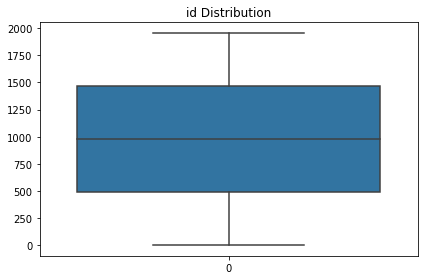

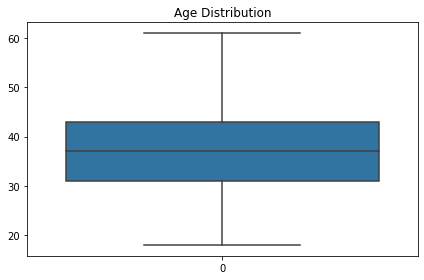

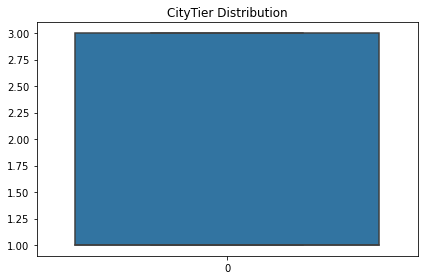

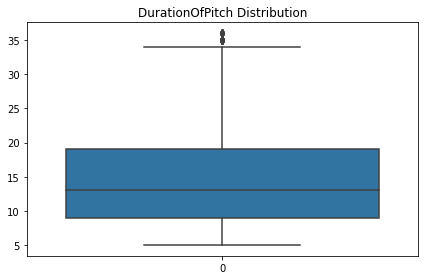

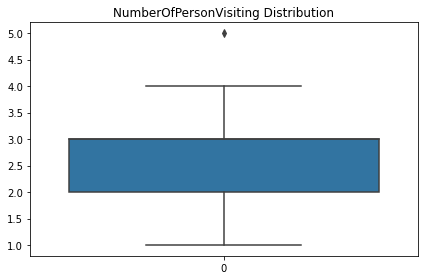

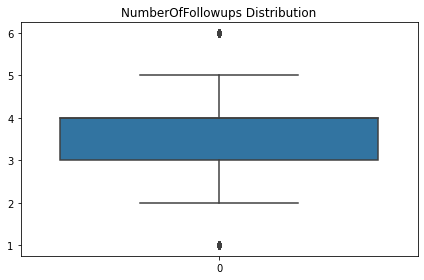

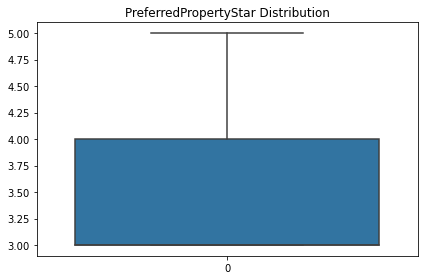

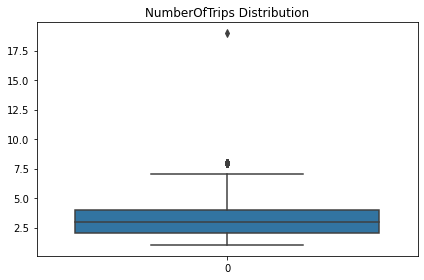

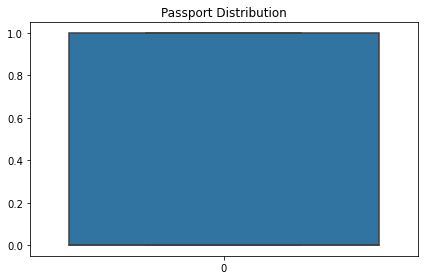

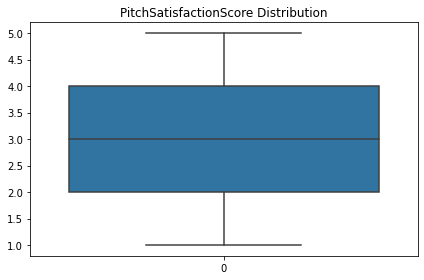

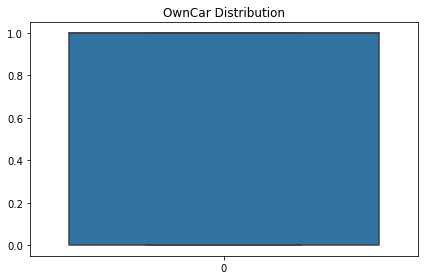

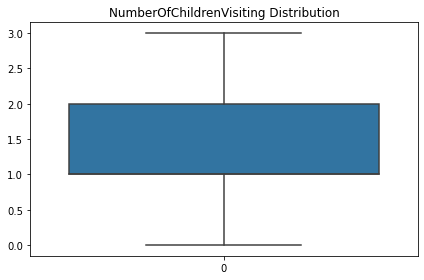

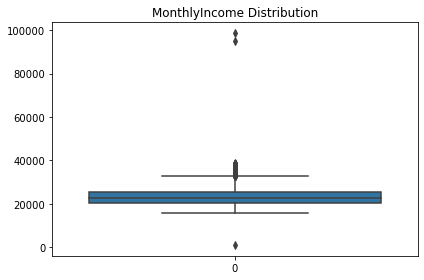

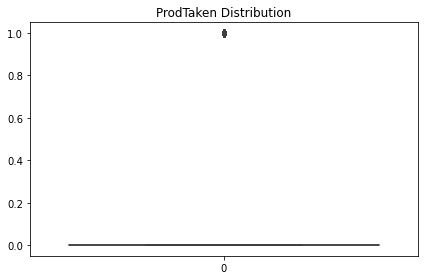

In [25]:
for col in numeric_cols :
  sns.boxplot(data = train_df[col])
  plt.title(col + ' Distribution')
  plt.tight_layout()
  plt.show()

In [26]:
#NumberOfTrips
a = train_df[train_df['NumberOfTrips'] >=7.5].index
train_df.drop(a, inplace=True)

In [27]:
#Monthlyincome
b = train_df[train_df['MonthlyIncome'] >= 35000].index
train_df.drop(b, inplace=True)

NumberOfTrips, MonthlyIncome 두가지 변수에 대해서만 처리해줬다

### prodtaken 값에 따른 그래프를 그려보기

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

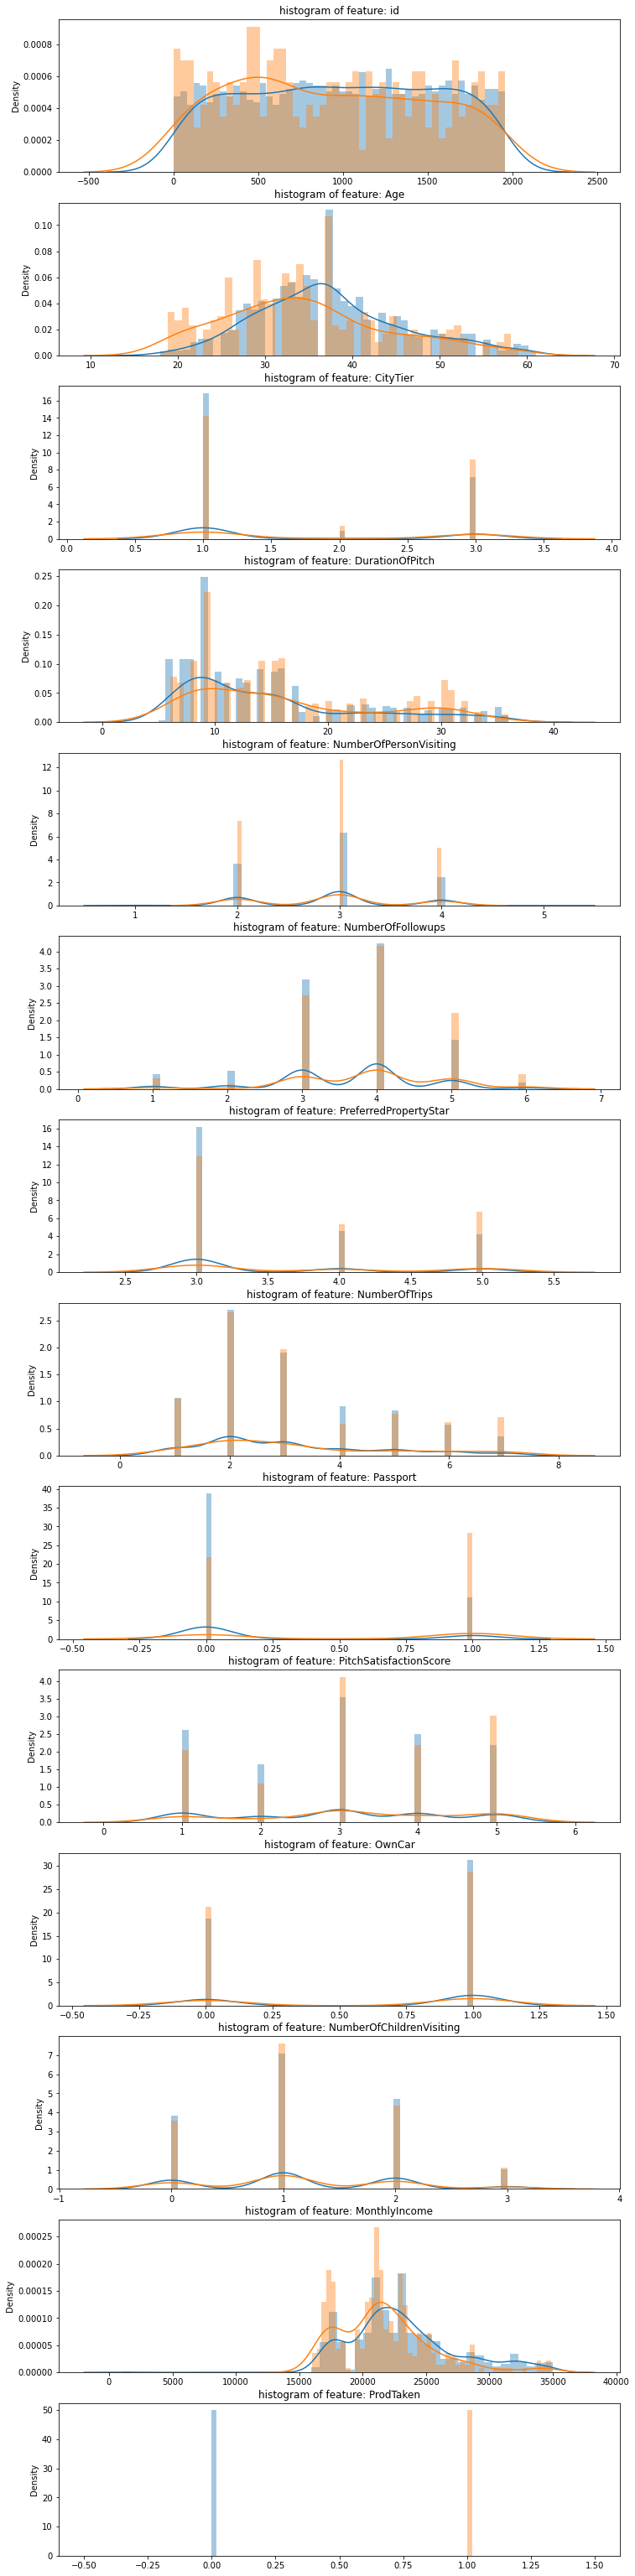

In [28]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,30*4))
gs = gridspec.GridSpec(30, 1)
for i, cn in enumerate(train_df[numeric_cols]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_df[cn][train_df.ProdTaken == 0], bins=50)
    sns.distplot(train_df[cn][train_df.ProdTaken == 1], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### 그냥 그래프를 그려보기

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

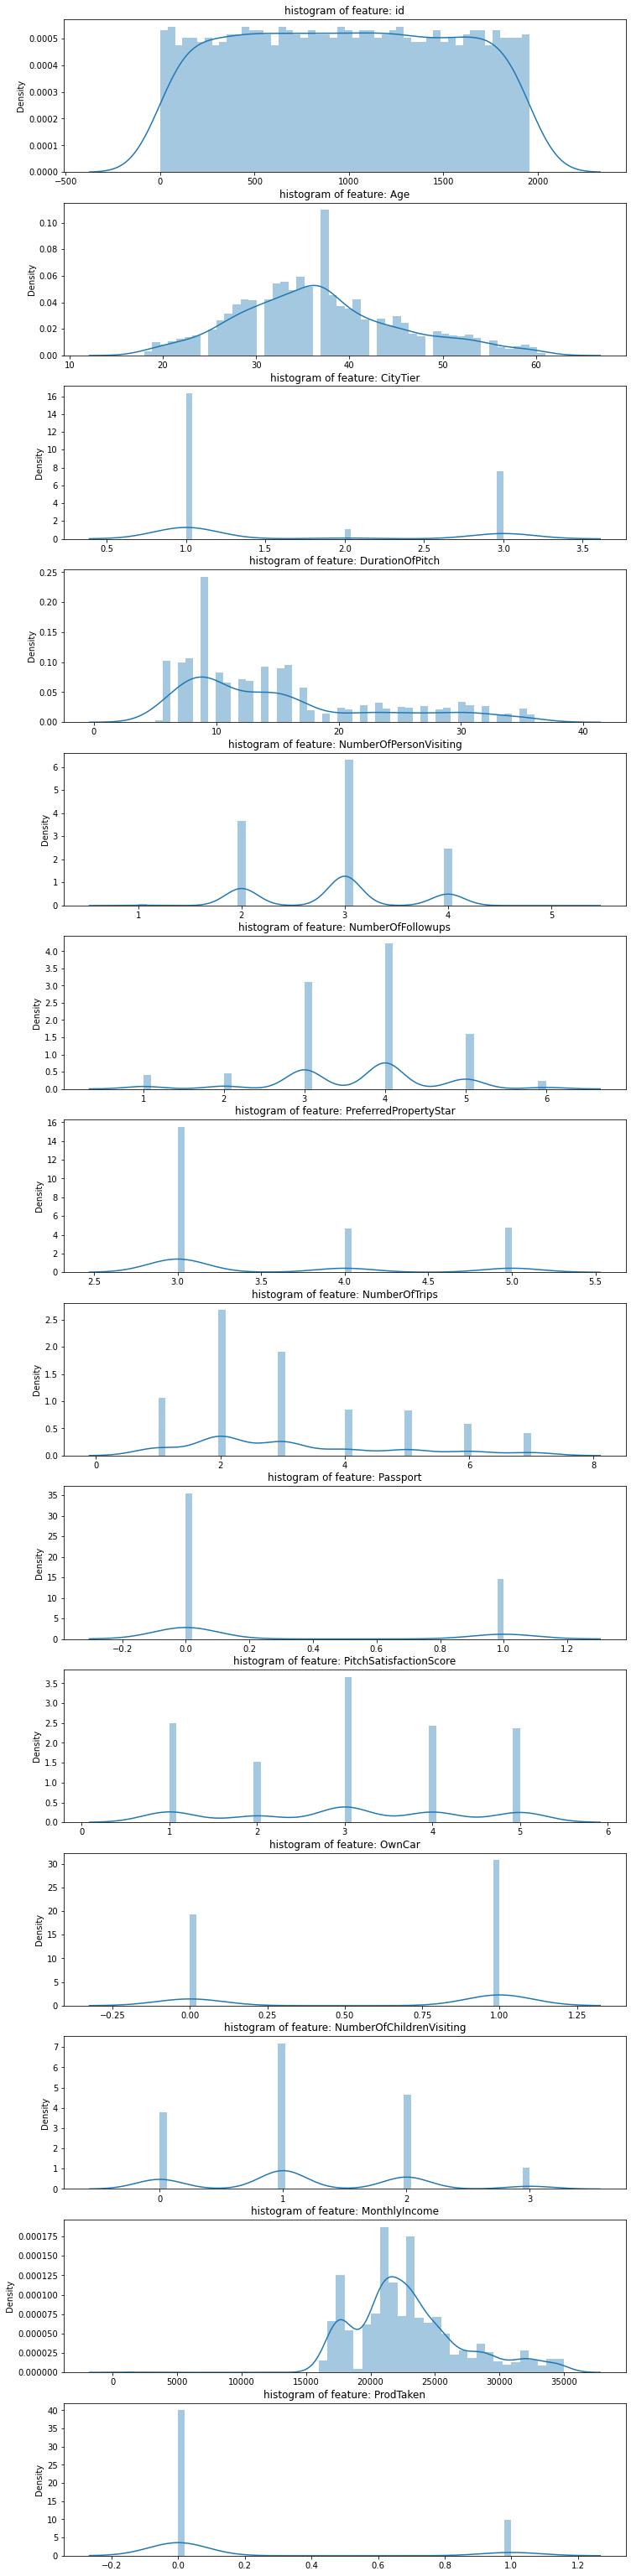

In [29]:
plt.figure(figsize=(12,30*4))
gs = gridspec.GridSpec(30, 1)
for i, cn in enumerate(train_df[numeric_cols]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_df[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### 상관관계 파악

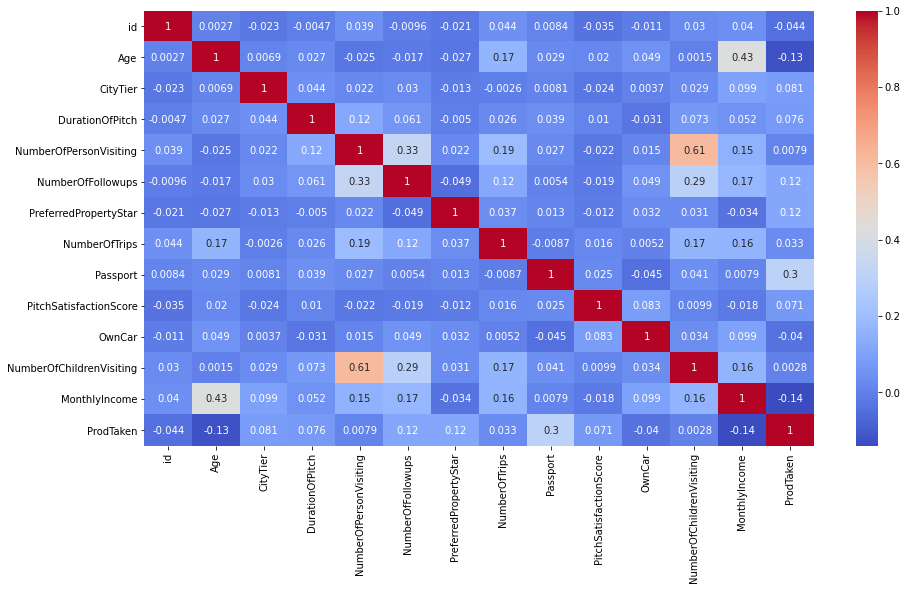

In [30]:
corr = train_df[numeric_cols].corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

### 문자형 변수 전처리

In [31]:
object_columns = train_df.columns[train_df.dtypes == 'object']
print('object 칼럼 : ', list(object_columns))

# 해당 칼럼만 보기
train_df[object_columns]

object 칼럼 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [32]:
train_df['TypeofContact'].value_counts()
# 원핫인코딩

Self Enquiry       1291
Company Invited     534
Unknown              10
Name: TypeofContact, dtype: int64

In [33]:
train_df['Occupation'].value_counts() 
# 원핫인코딩

Salaried          899
Small Business    779
Large Business    156
Free Lancer         1
Name: Occupation, dtype: int64

In [34]:
train_df['Gender'].value_counts()
#Fe Male의 값을 Female의 값으로 변화시킨다음 이진 변수로 만들기

Male       1128
Female      653
Fe Male      54
Name: Gender, dtype: int64

In [35]:
train_df['ProductPitched'].value_counts()
# 라벨 인코딩, ProductPitched : 추천해준 상품

Basic           728
Deluxe          672
Standard        293
Super Deluxe     96
King             46
Name: ProductPitched, dtype: int64

In [36]:
train_df['MaritalStatus'].value_counts()
# 결혼상태를 Married, unmarried 둘로만 나눈 뒤 이진 변수로 만들기

Married      892
Divorced     346
Single       323
Unmarried    274
Name: MaritalStatus, dtype: int64

In [37]:
train_df['Designation'].value_counts() # Designation: 고객의 직급
# 라벨 인코딩

Executive         728
Manager           672
Senior Manager    293
AVP                96
VP                 46
Name: Designation, dtype: int64

이진 변수로

In [38]:
# 교육 수준을 세 그룹으로 세분화
train_df["MaritalStatus"]=train_df["MaritalStatus"].replace({"Divorced":"Unmarried","Single":"Unmarried"})
train_df["MaritalStatus"]=train_df["MaritalStatus"].replace({"Unmarried":0,"Married":1})

In [39]:
train_df["Gender"]=train_df["Gender"].replace({"Fe Male":"Female"})
train_df["Gender"]=train_df["Gender"].replace({"Female":0,"Male":1})

라벨인코딩

In [40]:
from sklearn.preprocessing import LabelEncoder
object_columns= ['Designation','ProductPitched']
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_df[o_col])
    train_df[o_col] = encoder.transform(train_df[o_col])

원핫인코딩

In [41]:
train_dummies=pd.get_dummies(train_df[['TypeofContact','Occupation']],drop_first=True)

In [42]:
train_df.drop(['TypeofContact','Occupation'],axis=1, inplace=True)

In [43]:
train_df1 = pd.concat([train_df,train_dummies], axis=1)

In [44]:
train_df1.head()

,id,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,...,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,1,28.0,1,10.0,1,3,4.0,0,3.0,1,...,0,1.0,1,20384.0,0,0,0,0,0,1
1,2,34.0,3,9.0,0,2,4.0,1,4.0,0,...,1,0.0,2,19599.0,1,1,0,0,0,1
2,3,45.0,1,9.0,1,2,3.0,1,4.0,1,...,1,0.0,2,22912.0,0,0,0,0,1,0
3,4,29.0,1,7.0,1,3,5.0,0,4.0,1,...,0,1.0,1,21274.0,1,0,0,0,0,1
4,5,42.0,3,6.0,1,2,3.0,1,3.0,0,...,1,0.0,2,19907.0,0,1,0,0,1,0


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']])
train_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']] = scaler.transform(train_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']])

### test 데이터에도 똑같이 해주기

In [46]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


In [47]:
test_df.isnull().sum()

id                            0
Age                         132
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

In [48]:
test_df['Age'] = test_df['Age'].fillna(37)
test_df['DurationOfPitch'] = test_df['DurationOfPitch'].fillna(9)
test_df['TypeofContact'] = test_df['TypeofContact'].fillna("Unknown")
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].fillna(4)
test_df['PreferredPropertyStar'] = test_df['PreferredPropertyStar'].fillna(3)
test_df['NumberOfTrips'] = test_df['NumberOfTrips'].fillna(2)
test_df['NumberOfChildrenVisiting'] = test_df['NumberOfChildrenVisiting'].fillna(1)
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].fillna(23617.0)

In [49]:
test_df.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [50]:
numeric_cols = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = test_df.select_dtypes(include=['object']).columns.tolist()

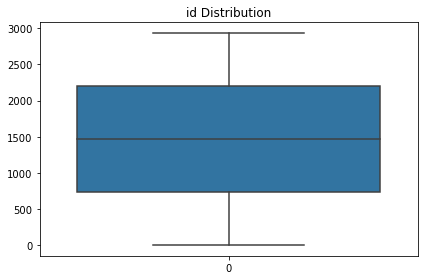

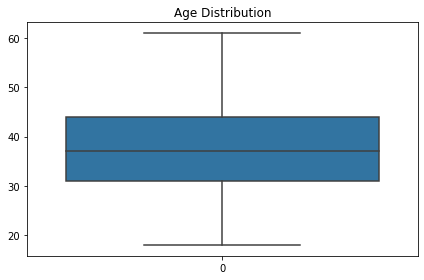

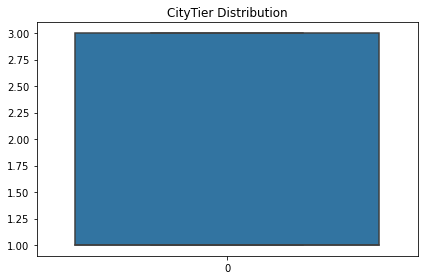

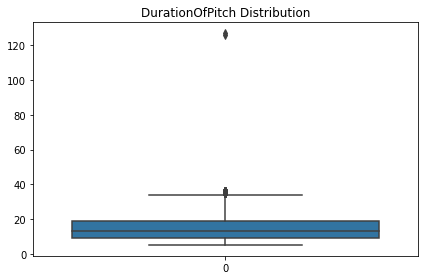

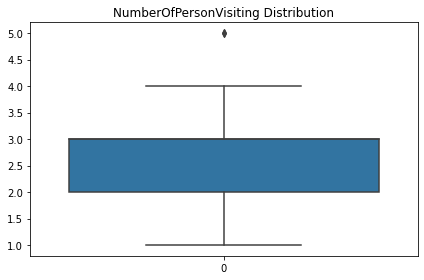

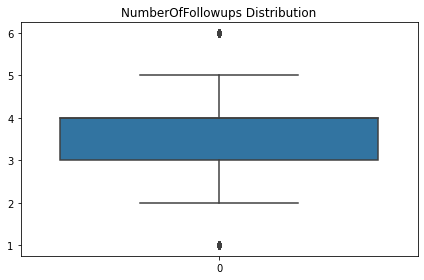

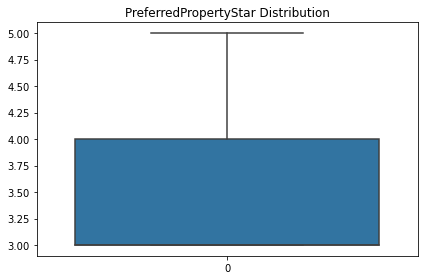

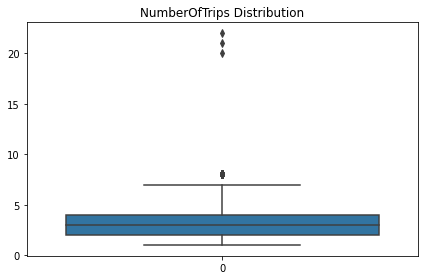

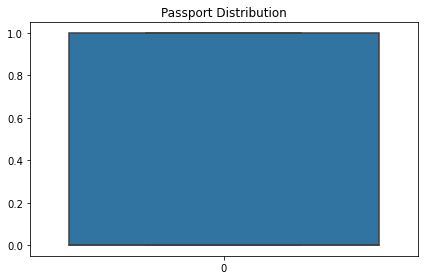

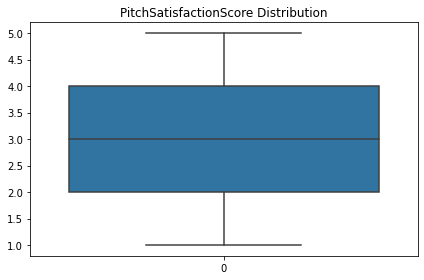

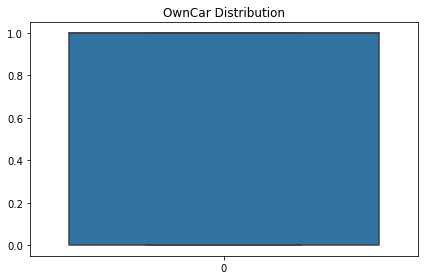

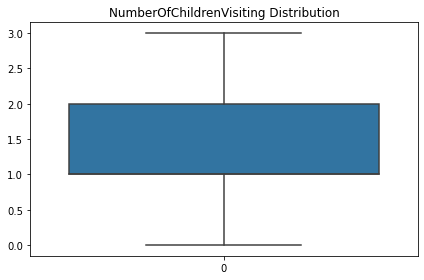

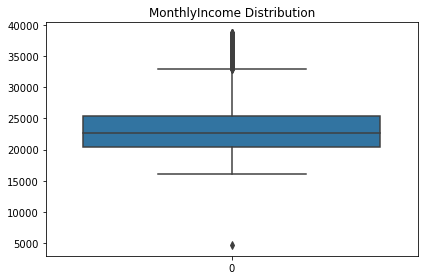

In [51]:
for col in numeric_cols :
  sns.boxplot(data = test_df[col])
  plt.title(col + ' Distribution')
  plt.tight_layout()
  plt.show()

In [52]:
a = test_df[test_df['NumberOfTrips'] >=7.5].index
test_df.drop(a, inplace=True)

a = test_df[test_df['MonthlyIncome'] >=30000].index
test_df.drop(a, inplace=True)

In [53]:
object_column = test_df.columns[test_df.dtypes == 'object']
print('object 칼럼 : ', list(object_column))

# 해당 칼럼만 보기
test_df[object_column]

object 칼럼 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Deluxe,Married,Manager
1,Self Enquiry,Small Business,Male,Deluxe,Married,Manager
2,Self Enquiry,Small Business,Male,Deluxe,Married,Manager
3,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4,Self Enquiry,Large Business,Female,Basic,Unmarried,Executive
...,...,...,...,...,...,...
2926,Self Enquiry,Salaried,Female,Deluxe,Married,Manager
2929,Self Enquiry,Small Business,Fe Male,Deluxe,Unmarried,Manager
2930,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2931,Self Enquiry,Small Business,Male,Basic,Unmarried,Executive


In [54]:
test_df.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [55]:
# 교육 수준을 세 그룹으로 세분화
test_df["MaritalStatus"]=test_df["MaritalStatus"].replace({"Divorced":"Unmarried","Single":"Unmarried"})
test_df["MaritalStatus"]=test_df["MaritalStatus"].replace({"Unmarried":0,"Married":1})


test_df["Gender"]=test_df["Gender"].replace({"Fe Male":"Female"})
test_df["Gender"]=test_df["Gender"].replace({"Female":0,"Male":1})


from sklearn.preprocessing import LabelEncoder
object_columns= ['Designation','ProductPitched']
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(test_df[o_col])
    test_df[o_col] = encoder.transform(test_df[o_col])
    
test_dummies=pd.get_dummies(test_df[['TypeofContact','Occupation']],drop_first=True)
test_df.drop(['TypeofContact','Occupation'],axis=1, inplace=True)

test_df1 = pd.concat([test_df,test_dummies], axis=1)
print(test_df1.isnull().sum())

id                            0
Age                           0
CityTier                      0
DurationOfPitch               0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
TypeofContact_Self Enquiry    0
TypeofContact_Unknown         0
Occupation_Salaried           0
Occupation_Small Business     0
dtype: int64


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(test_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']])
test_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']] = scaler.transform(test_df1[['Age', 'DurationOfPitch', 'MonthlyIncome']])

In [57]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

       
for col in numeric_cols:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_df1[col].skew()) 
         )

id              Skewness: 00.00
Age             Skewness: 00.43
CityTier        Skewness: 00.75
DurationOfPitch Skewness: 00.97
Gender          Skewness: -0.47
NumberOfPersonVisiting Skewness: 00.07
NumberOfFollowups Skewness: -0.43
PreferredPropertyStar Skewness: 00.93
MaritalStatus   Skewness: 00.06
NumberOfTrips   Skewness: 00.78
Passport        Skewness: 00.92
PitchSatisfactionScore Skewness: -0.12
OwnCar          Skewness: -0.47
NumberOfChildrenVisiting Skewness: 00.26
MonthlyIncome   Skewness: 00.75
ProdTaken       Skewness: 01.51


In [58]:
numeric_col = ['id','Age','CityTier','DurationOfPitch','Gender','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
 'MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']

for col in numeric_col:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(test_df1[col].skew()) 
         )

id              Skewness: -0.01
Age             Skewness: 00.58
CityTier        Skewness: 00.68
DurationOfPitch Skewness: 02.37
Gender          Skewness: -0.36
NumberOfPersonVisiting Skewness: 00.09
NumberOfFollowups Skewness: -0.34
PreferredPropertyStar Skewness: 00.91
MaritalStatus   Skewness: 00.13
NumberOfTrips   Skewness: 00.83
Passport        Skewness: 00.92
PitchSatisfactionScore Skewness: -0.11
OwnCar          Skewness: -0.46
NumberOfChildrenVisiting Skewness: 00.32
MonthlyIncome   Skewness: 00.23


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X= train_df1.drop(columns=['ProdTaken','id'])
y = train_df1[['ProdTaken']] 

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2)

## 모델 돌려보기

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

### LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression()
lgreg.fit(X_train, y_train)

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
print(lgreg.score(X_train, y_train))

0.8303814713896458


In [63]:
lgreg.score(X_valid, y_valid)

0.8583106267029973

In [74]:
lgreg_pred = lgreg.predict(X_valid)

get_clf_eval(y_valid, lgreg_pred)

Confusion Matrix
[[290   8]
 [ 44  25]]
정확도:0.8583106267029973, 정밀도:0.7575757575757576, 재현율:0.36231884057971014


### decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
print(model.score(X_train, y_train))

1.0


In [66]:
model.score(X_valid, y_valid)

0.8174386920980926

In [76]:
model_pred = model.predict(X_valid)

get_clf_eval(y_valid, model_pred)

Confusion Matrix
[[264  34]
 [ 33  36]]
정확도:0.8174386920980926, 정밀도:0.5142857142857142, 재현율:0.5217391304347826


### SVM

In [71]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [77]:
print(clf.score(X_train, y_train))

0.797683923705722


In [78]:
clf.score(X_valid, y_valid)

0.8119891008174387

In [79]:
clf_pred = clf.predict(X_valid)

get_clf_eval(y_valid, clf_pred)

Confusion Matrix
[[298   0]
 [ 69   0]]
정확도:0.8119891008174387, 정밀도:0.0, 재현율:0.0


C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
test_df1

,id,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,...,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Salaried,Occupation_Small Business
0,1,0.325581,3,0.032787,1,2,5.0,1,3.0,1,...,0,2,0,1.0,2,0.595456,0,0,0,1
1,2,0.651163,2,0.049180,1,3,4.0,1,4.0,1,...,1,5,0,1.0,2,0.609478,1,0,0,1
2,3,0.441860,3,0.139344,1,3,4.0,1,3.0,1,...,0,5,1,0.0,2,0.661635,1,0,0,1
3,4,0.581395,1,0.254098,1,3,6.0,1,3.0,0,...,0,3,1,2.0,2,0.725828,1,0,0,1
4,5,0.162791,3,0.016393,0,4,4.0,0,4.0,0,...,1,4,1,3.0,1,0.683324,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2927,0.511628,1,0.073770,0,3,3.0,1,5.0,1,...,1,1,0,0.0,2,0.668865,1,0,1,0
2929,2930,0.348837,1,0.032787,0,4,2.0,1,3.0,0,...,0,3,0,1.0,2,0.756932,1,0,0,1
2930,2931,0.348837,1,0.213115,1,4,4.0,1,3.0,0,...,0,4,1,1.0,2,0.767022,0,0,1,0
2931,2932,0.186047,1,0.032787,1,4,2.0,0,5.0,0,...,0,2,1,3.0,1,0.692143,1,0,0,1


In [144]:
test_df = pd.read_csv('test.csv')
a = test_df[test_df['NumberOfTrips'] >=7.5].index
print(a)

Int64Index([  50,  120,  194,  233,  351,  387,  417,  435,  489,  602,  697,
             706,  739,  751,  771,  781,  806,  835,  837,  853,  877,  885,
             923,  953,  991, 1069, 1090, 1120, 1134, 1183, 1212, 1309, 1315,
            1316, 1323, 1352, 1354, 1471, 1495, 1593, 1618, 1631, 1734, 1757,
            1771, 1806, 1835, 1992, 2000, 2016, 2059, 2162, 2231, 2338, 2375,
            2463, 2469, 2478, 2513, 2594, 2598, 2611, 2637, 2651, 2711, 2713,
            2715, 2778, 2780, 2803, 2927],
           dtype='int64')


In [143]:
test_df = pd.read_csv('test.csv')
a = test_df[test_df['NumberOfTrips'] >=7.5].index
sample_submission.drop(a, inplace=True)

b = test_df[test_df['MonthlyIncome'] >=30000].index
sample_submission.drop(b, inplace=True)

KeyError: '[  50  120  194  233  351  387  417  435  489  602  697  706  739  751\n  771  781  806  835  837  853  877  885  923  953  991 1069 1090 1120\n 1134 1183 1212 1309 1315 1316 1323 1352 1354 1471 1495 1593 1618 1631\n 1734 1757 1771 1806 1835 1992 2000 2016 2059 2162 2231 2338 2375 2463\n 2469 2478 2513 2594 2598 2611 2637 2651 2711 2713 2715 2778 2780 2803\n 2927] not found in axis'

In [138]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['ProdTaken'] = lgreg.predict(test_df1)

C:\Users\rhskr\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- Occupation_Large Business

  warnings.warn(message, FutureWarning)


ValueError: Length of values (2508) does not match length of index (2933)